In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


class Schelling:

    def __init__(self, size, population_ratio, threshold):
        self.size = size 
        self.threshold = threshold
        
        self.population_ration  = population_ratio
        p = [population_ratio / 2, population_ratio / 2, 1 - population_ratio ]
        self.map = np.random.choice([1, -1, 0], size = (size, size), p=p)
        
        
        
    def run(self):
        free_cells = []
        unhappy_agents = []
        for (row, col), value in np.ndenumerate(self.map):
            cell = np.array([row, col])
            if int(value) == 0:
                free_cells.append(cell)
            elif self.is_unhappy(cell):
                self.map[tuple(cell)] = 0
                free_cells.append(cell)
                unhappy_agents.append(value)
        cells_indices = np.random.choice(np.arange(len(free_cells)), size = len(unhappy_agents), replace=False )
        for value, cell in zip(unhappy_agents, np.array(free_cells)[cells_indices]):
            self.map[tuple(cell)] = value
        return len(unhappy_agents)
                
                        
    def is_unhappy(self, cell):

        agent_type = self.map[tuple(cell)]
        lt = np.clip((cell - [1, 1]), 0, size-1)
        rb= np.clip((cell + [1, 1]), 0, size-1)
        
        neighbors = self.map[lt[0] : rb[0]+1 , lt[1] : rb[1]+1]
        values, counts = np.unique(neighbors, return_counts = True)
        unhappy = False
        if counts[np.where(values == agent_type)[0][0]] - 1 < self.threshold * (neighbors.shape[0] * neighbors.shape[1] - 1):
            unhappy = True
        return unhappy
        
        

In [2]:
size = 50
population_ratio = 0.8
threshold = 0.375
schelling = Schelling(size, population_ratio, threshold)

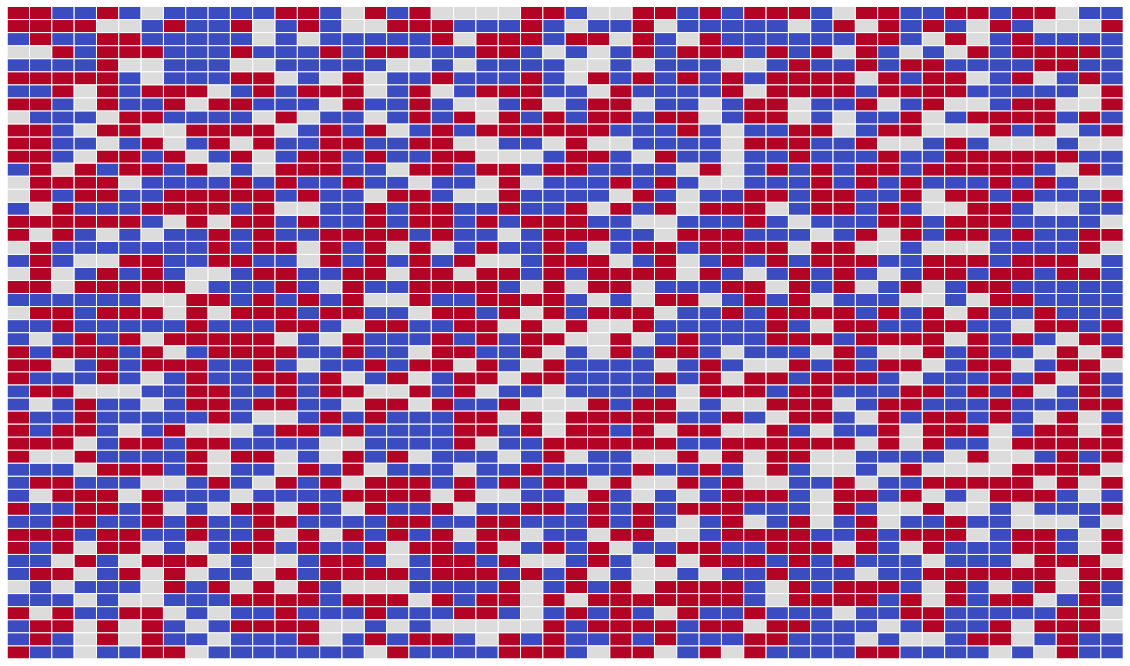

In [3]:
plt.rcParams["figure.figsize"] = (20,12) 
plt.rcParams["font.size"] = 14
plt.style.use("ggplot")
plt.axis('off')
plt.pcolor(schelling.map, cmap='coolwarm', edgecolors='w', linewidths=1)# white -- empty
plt.show()

In [4]:
for i in range(20):
    schelling.run()

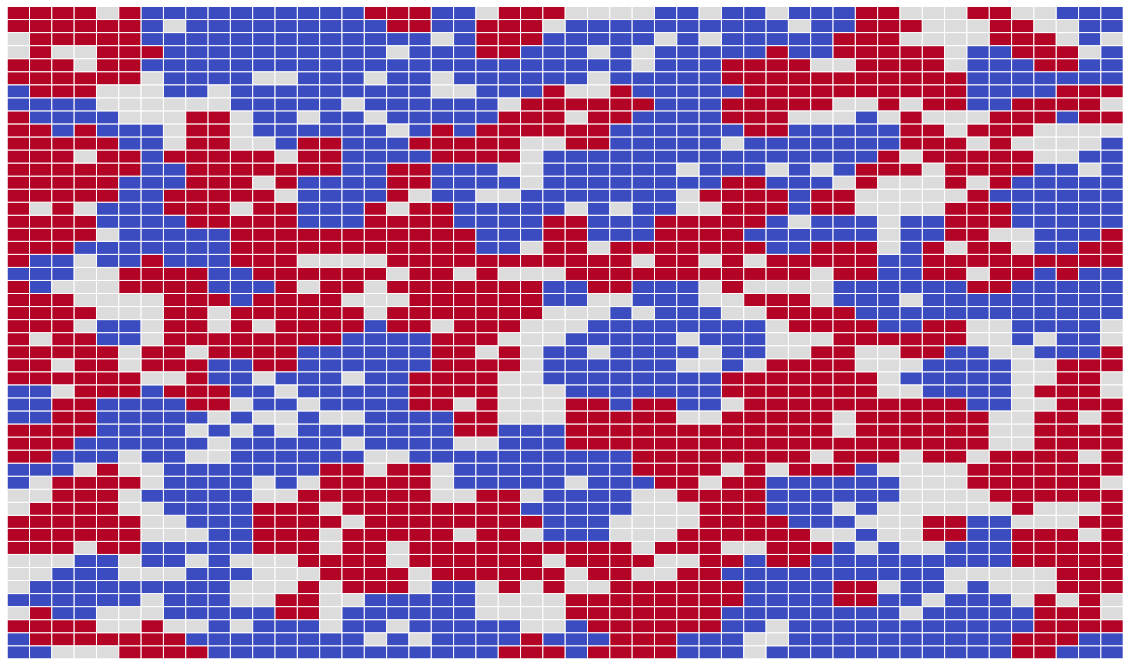

In [5]:
plt.rcParams["figure.figsize"] = (20,12) 
plt.rcParams["font.size"] = 14
plt.style.use("ggplot")
plt.axis('off')
plt.pcolor(schelling.map, cmap='coolwarm', edgecolors='w', linewidths=1)# white -- empty
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [06:39<00:00, 44.42s/it]


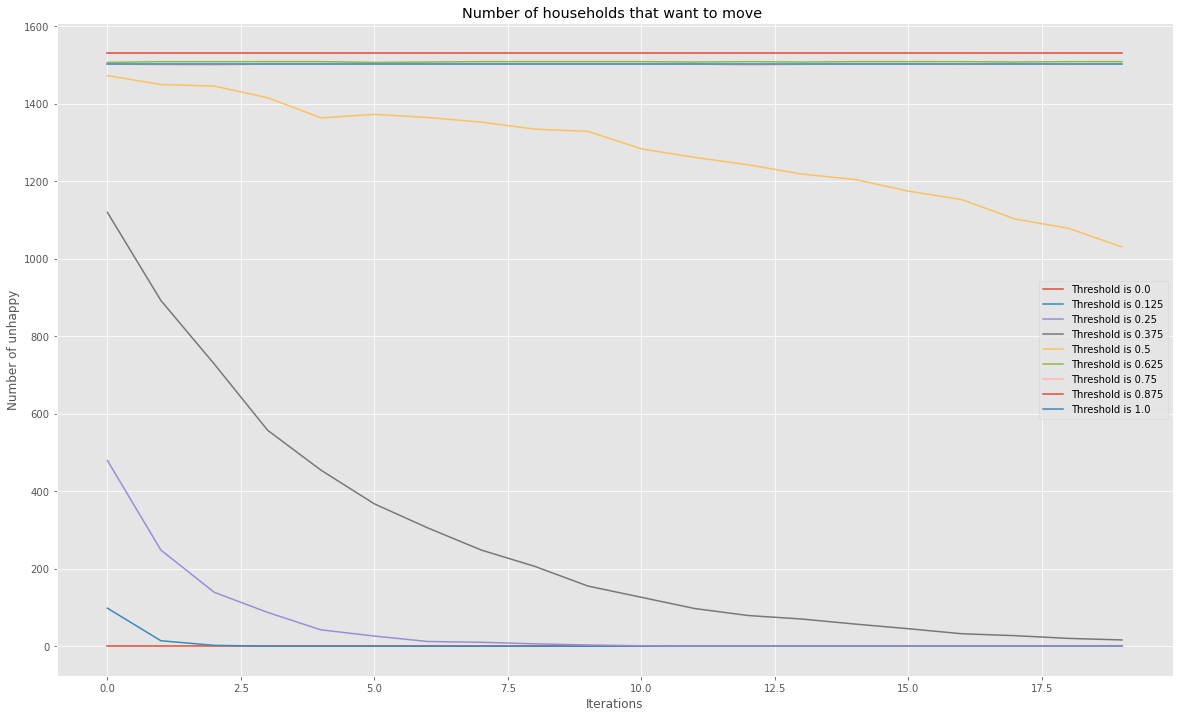

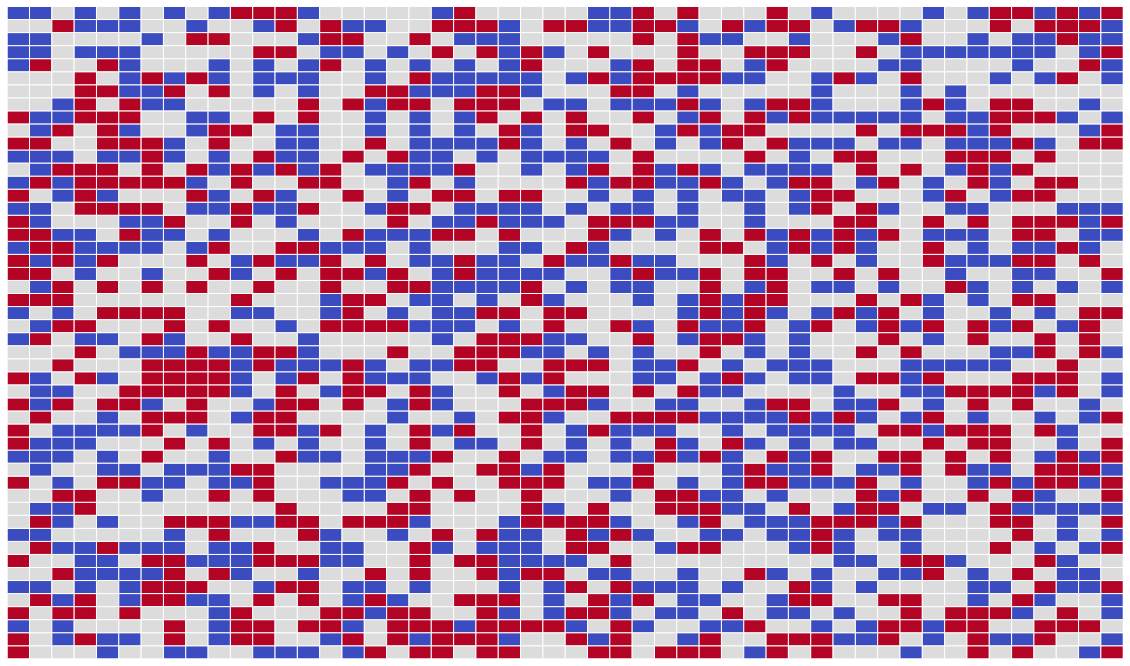

In [6]:
from tqdm import tqdm
import imageio
thresholds = [i / 8 for i in range(9)]
fig1, axes1 = plt.subplots(figsize=(20, 12))
fig2, axes2 = plt.subplots()
for t in tqdm(thresholds):
    size = 50
    population_ratio = 0.6
    threshold = t
    schelling = Schelling(size, population_ratio, threshold)
    filenames = []
    unhappy = []
    for i in (range(20)):
        number_unhappy = schelling.run()
        unhappy.append(number_unhappy)
        # Left hand side graph with Schelling simulation plot
        axes2.axis('off')
        axes2.pcolor(schelling.map, cmap='coolwarm', edgecolors='w', linewidths=1)# white -- empty
        fig2.savefig(f'{t}_{i}.png')        
        filenames.append(f'{t}_{i}.png')
    axes1.plot(unhappy, label = f'Threshold is {t}')
    frames = []
    for filename in filenames:
        frames.append(imageio.imread(filename))
    imageio.mimsave(f'{t}.gif', frames)
axes1.set_title('Number of households that want to move ')
axes1.set_xlabel('Iterations')
axes1.set_ylabel('Number of unhappy')

axes1.legend()
